https://stepik.org/lesson/1370092/step/1

https://raw.githubusercontent.com/selfedu-rus/machine_learning/refs/heads/main/machine_learning_9_sgd.py

[ 0.31638794 -0.15033549  0.00470031]
[1.0, 1.0, 1.0032535544686445, 1.0008292199009292, 1.005167609390597, 1.0030120401852953, 0.998334006369221, 0.9920523060801677, 0.9977294385795104, 0.9907929243501125, 0.9831579180097977, 0.9744885810331657, 0.9662731949063559, 0.9746571311689322, 0.9824005178181807, 0.9751304492525313, 0.9833127527736303, 0.974815803872866, 0.9671697212836754, 0.9752087246899575, 0.966111696871606, 0.9570101980707033, 0.9487744952511401, 0.9396779130946546, 0.9469977083727456, 0.9388725046105918, 0.9459178612180822, 0.9521900624705341, 0.9445880565401166, 0.9367044506653907, 0.9282212754529688, 0.9352592950615217, 0.9433961365774777, 0.934793647900215, 0.9261288252624851, 0.9179325693017114, 0.9264693621453481, 0.919680114078827, 0.912442178548104, 0.9049291576888548, 0.9126383633471337, 0.9215151706316161, 0.9297783305461043, 0.9333970670564863, 0.9263816585180532, 0.9307366118335691, 0.9335302241497967, 0.9362162324644678, 0.9325583299957807, 0.9311667963968355

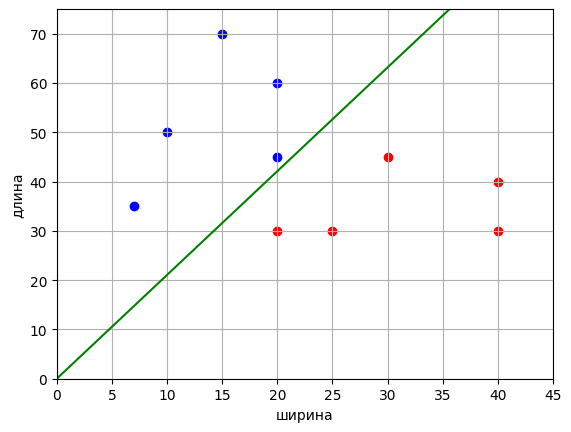

In [ ]:
# @title Оригинал, w_0 - в конце
import numpy as np
import matplotlib.pyplot as plt


# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))


# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y


# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = 0.0005  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 500  # число итераций SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)

print(w)
print(Q_plot)

line_x = list(range(max(x_train[:, 0])))  # формирование графика разделяющей линии
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

Оптимизированные веса: [ 0.00403461  0.33496726 -0.16482287]
Показатель качества: [1.0, 1.0, 1.0040123916609915, 1.0025499408974727, 1.0048428270037912, 1.0048512005672057, 1.003506318729645, 1.0068755465649963, 1.0049904596804675, 1.000860413803367, 1.006282189236479, 1.0022441638557833, 1.0047512662976859, 1.0062528656639216, 1.0050673621608976, 1.0002065661239103, 0.9996860525106787, 0.9989807834994748, 0.9962440887810108, 0.9926509849522939, 0.991376239348193, 0.9898033643847964, 0.989022175155843, 0.9855508001508291, 0.9796926117498256, 0.9732862641920915, 0.9796341779438822, 0.9728314677083891, 0.9641766637386915, 0.955454722450949, 0.9483096579290431, 0.9522428718112115, 0.9570989166162164, 0.9598034889745541, 0.9567900367681624, 0.9513139563293369, 0.9564296817495143, 0.9510878561552154, 0.9444006529110569, 0.9357409232804158, 0.9288708824282897, 0.9325467706319114, 0.9242740912111055, 0.9173060568428654, 0.9087404835981631, 0.9112203497620668, 0.9030344083401993, 0.90456850853

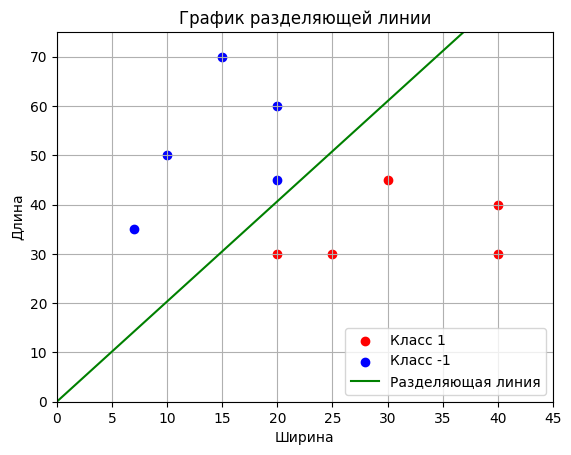

In [ ]:
# @title Редакция, w_0 - в начале
import numpy as np
import matplotlib.pyplot as plt

# Сигмоидная функция потерь
loss = lambda w, x, y: 2 / (1 + np.exp(w @ x * y))

# Производная сигмоидной функции потерь по вектору w
df = lambda w, x, y: -2 * (1 + np.exp(w @ x * y)) ** (-2) * np.exp(w @ x * y) * x * y

# Обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70],
           [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [[1] + x for x in x_train]  # Добавление 1 в каждый вектор

x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train) # размер обучающей выборки
w = np.zeros(3)        # начальные весовые коэффициенты (вектор нулей)
nt = 0.0005            # шаг сходимости SGD
lm = 0.01              # скорость "забывания" для Q
N = 500                # число итераций SGD

# Показатель качества
Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train)       # Случайный индекс (включая n_train)
    ek = loss(w, x_train[k], y_train[k])    # Вычисление потерь для выбранного вектора
    w -= nt * df(w, x_train[k], y_train[k]) # Корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q              # Пересчет показателя качества
    Q_plot.append(Q)

print("Оптимизированные веса:", w)
print("Показатель качества:", Q_plot)

# Формирование графика разделяющей линии
line_x = np.linspace(0, max(x_train[:, 1]), num=100)
line_y = -w[1] / w[2] * line_x - w[0] / w[2]

# Формирование точек для классов
x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

# Построение графика
plt.scatter(x_0[:, 1], x_0[:, 2], color='red', label='Класс 1')
plt.scatter(x_1[:, 1], x_1[:, 2], color='blue', label='Класс -1')
plt.plot(line_x, line_y, color='green', label='Разделяющая линия')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("Длина")
plt.xlabel("Ширина")
plt.grid(True)
plt.legend()
plt.title("График разделяющей линии")
plt.show()

<img src='http://mech.math.msu.su/~vvb/MasterAI/GradientDescent2.png'>